In [5]:
from visualize import VisualizeNN as VisNN
from sklearn.neural_network import MLPClassifier
import numpy as np
import torch

In [2]:
# dummy data for fully-connected layer interconnctions visualization
training_set_inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
training_set_outputs = np.array([[0, 1, 1, 1, 1, 0, 0]]).T
X = training_set_inputs
y = training_set_outputs

In [3]:
# fitting dummy FC layer to data
classifier = MLPClassifier(hidden_layer_sizes=(4,), alpha=0.01, tol=0.001, random_state=1)
classifier.fit(X, y.ravel())

MLPClassifier(alpha=0.01, hidden_layer_sizes=(4,), random_state=1, tol=0.001)

In [4]:
# reformat weights
network_structure = np.hstack(([X.shape[1]], np.asarray(classifier.hidden_layer_sizes), [y.shape[1]]))

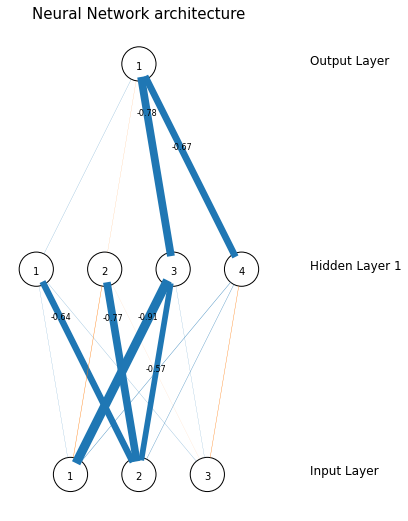

In [6]:
# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, classifier.coefs_)
network.draw()

# Numerical test

How sparse are each of the individual layers?

In [7]:
# Oredered dictionary, inherets from dict
model = torch.load('./pruned_models/post-final-train-mag3-002-truetrue.pt')

In [11]:
print(model.keys())

odict_keys(['conv.weight', 'conv.weight_mask', 'bn.weight', 'bn.bias', 'bn.running_mean', 'bn.running_var', 'bn.num_batches_tracked', 'bn.weight_mask', 'bn.bias_mask', 'blocks.0.conv1.weight', 'blocks.0.conv1.weight_mask', 'blocks.0.bn1.weight', 'blocks.0.bn1.bias', 'blocks.0.bn1.running_mean', 'blocks.0.bn1.running_var', 'blocks.0.bn1.num_batches_tracked', 'blocks.0.bn1.weight_mask', 'blocks.0.bn1.bias_mask', 'blocks.0.conv2.weight', 'blocks.0.conv2.weight_mask', 'blocks.0.bn2.weight', 'blocks.0.bn2.bias', 'blocks.0.bn2.running_mean', 'blocks.0.bn2.running_var', 'blocks.0.bn2.num_batches_tracked', 'blocks.0.bn2.weight_mask', 'blocks.0.bn2.bias_mask', 'blocks.0.shortcut.weight', 'blocks.0.shortcut.weight_mask', 'blocks.1.conv1.weight', 'blocks.1.conv1.weight_mask', 'blocks.1.bn1.weight', 'blocks.1.bn1.bias', 'blocks.1.bn1.running_mean', 'blocks.1.bn1.running_var', 'blocks.1.bn1.num_batches_tracked', 'blocks.1.bn1.weight_mask', 'blocks.1.bn1.bias_mask', 'blocks.1.conv2.weight', 'blocks.

In [14]:
# NOTE: code adapted for wide-resnet32

# Print sparsity percent for each layer
for i in range(14):
    for j in range(2):
        print(f'block {i} conv{j+1}')
        # print number of zeros in each mask
        mask = model[f'blocks.{i}.conv{j+1}.weight_mask']
        print(-1*(mask - 1).sum() / mask.numel())

# Print sparsity for final 
mask = model['fc.weight_mask']
print('Final FC layer sparsity')
print(-1*(mask - 1).sum() / mask.numel())

block 0 conv1
tensor(0.9812, device='cuda:0')
block 0 conv2
tensor(0.9842, device='cuda:0')
block 1 conv1
tensor(0.9871, device='cuda:0')
block 1 conv2
tensor(0.9900, device='cuda:0')
block 2 conv1
tensor(0.9886, device='cuda:0')
block 2 conv2
tensor(0.9920, device='cuda:0')
block 3 conv1
tensor(0.9895, device='cuda:0')
block 3 conv2
tensor(0.9939, device='cuda:0')
block 4 conv1
tensor(0.9872, device='cuda:0')
block 4 conv2
tensor(0.9922, device='cuda:0')
block 5 conv1
tensor(0.9946, device='cuda:0')
block 5 conv2
tensor(0.9956, device='cuda:0')
block 6 conv1
tensor(0.9954, device='cuda:0')
block 6 conv2
tensor(0.9964, device='cuda:0')
block 7 conv1
tensor(0.9966, device='cuda:0')
block 7 conv2
tensor(0.9980, device='cuda:0')
block 8 conv1
tensor(0.9975, device='cuda:0')
block 8 conv2
tensor(0.9984, device='cuda:0')
block 9 conv1
tensor(0.9979, device='cuda:0')
block 9 conv2
tensor(0.9988, device='cuda:0')
block 10 conv1
tensor(0.9988, device='cuda:0')
block 10 conv2
tensor(0.9993, dev